In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('plant_health_data.csv')

df = df.drop(['Timestamp', 'Plant_ID'], axis=1)

le = LabelEncoder()
df['Plant_Health_Status'] = le.fit_transform(df['Plant_Health_Status'])

X = df.drop('Plant_Health_Status', axis=1)
y = df['Plant_Health_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Accuracy: 99.58%

Classification Report:
                 precision    recall  f1-score   support

        Healthy       1.00      1.00      1.00        65
    High Stress       1.00      0.99      0.99        85
Moderate Stress       0.99      1.00      0.99        90

       accuracy                           1.00       240
      macro avg       1.00      1.00      1.00       240
   weighted avg       1.00      1.00      1.00       240



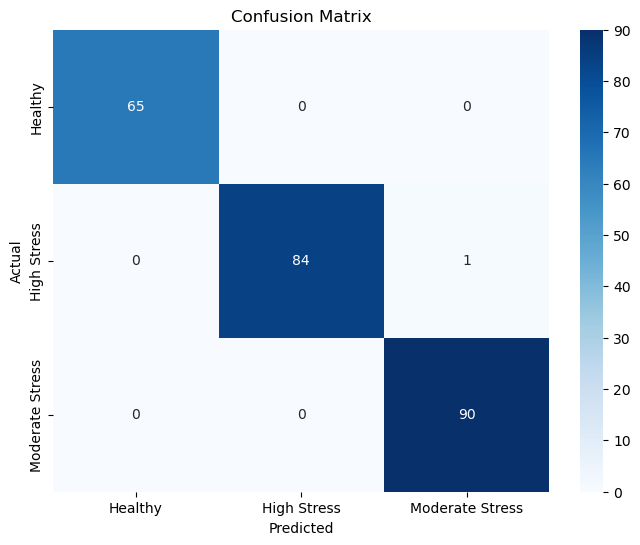

In [2]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Svm

In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42) 
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluar el modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')

print('\\nSVM Classification Report:')
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

SVM Accuracy: 82.50%
\nSVM Classification Report:
                 precision    recall  f1-score   support

        Healthy       0.83      0.82      0.82        65
    High Stress       0.87      0.91      0.89        85
Moderate Stress       0.78      0.76      0.77        90

       accuracy                           0.82       240
      macro avg       0.82      0.83      0.83       240
   weighted avg       0.82      0.82      0.82       240



# KNN

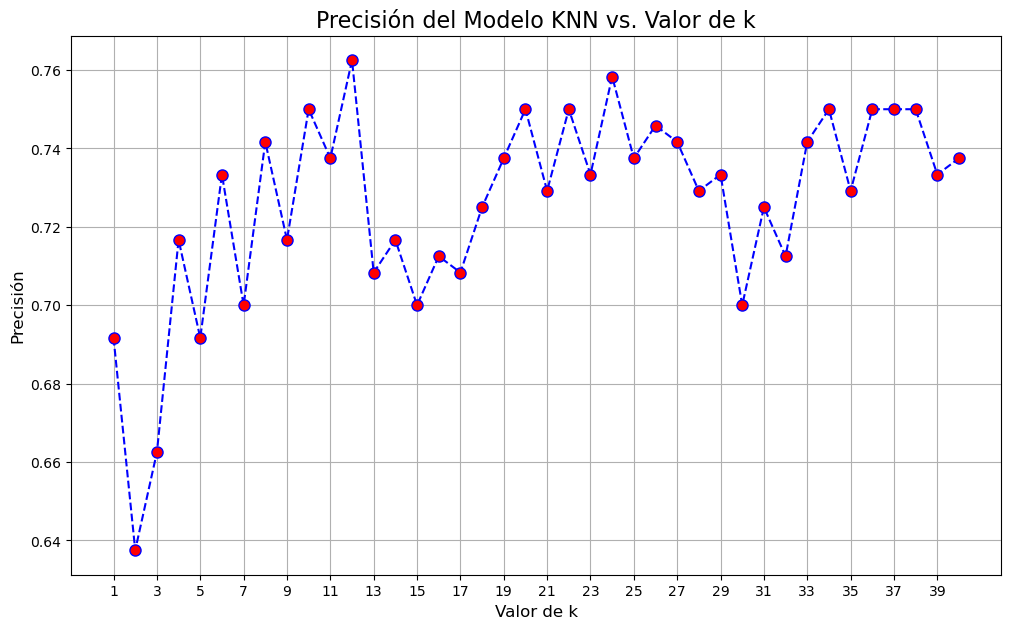

KNN Accuracy: 76.25%

KNN Classification Report:
                 precision    recall  f1-score   support

        Healthy       0.80      0.78      0.79        65
    High Stress       0.78      0.89      0.83        85
Moderate Stress       0.72      0.62      0.67        90

       accuracy                           0.76       240
      macro avg       0.76      0.77      0.76       240
   weighted avg       0.76      0.76      0.76       240



In [8]:
from sklearn.neighbors import KNeighborsClassifier
# --- 2. Encontrar el 'k' Óptimo ---
k_range = range(1, 41)
accuracy_scores = []

# Iterar sobre diferentes valores de k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# --- 3. Generar el Gráfico ---
plt.figure(figsize=(12, 7))
plt.plot(k_range, accuracy_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Precisión del Modelo KNN vs. Valor de k', fontsize=16)
plt.xlabel('Valor de k', fontsize=12)
plt.ylabel('Precisión', fontsize=12)
plt.grid(True)
plt.xticks(range(1, 41, 2)) # Marcas en el eje X para mejor legibilidad
plt.show()

# Crear y ENTRENAR el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=12) # Usamos k=12 que fue un valor óptimo
knn_model.fit(X_train_scaled, y_train) # <--- ESTA ES LA LÍNEA QUE FALTABA

# Ahora sí, realizar predicciones
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluar el modelo KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn * 100:.2f}%')

# Imprimir el reporte de clasificación
print('\nKNN Classification Report:')
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))

## graficos extra con Random Forest


##### Gráfico de Importancia de Características (Feature Importance Plot)


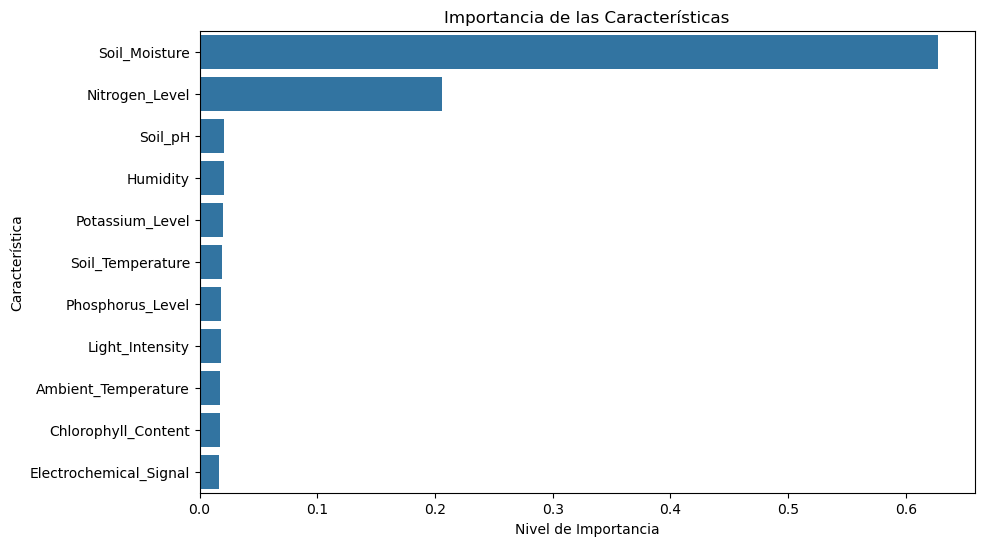

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Importancia de las Características')
plt.xlabel('Nivel de Importancia')
plt.ylabel('Característica')
plt.show()


##### Curva ROC y AUC


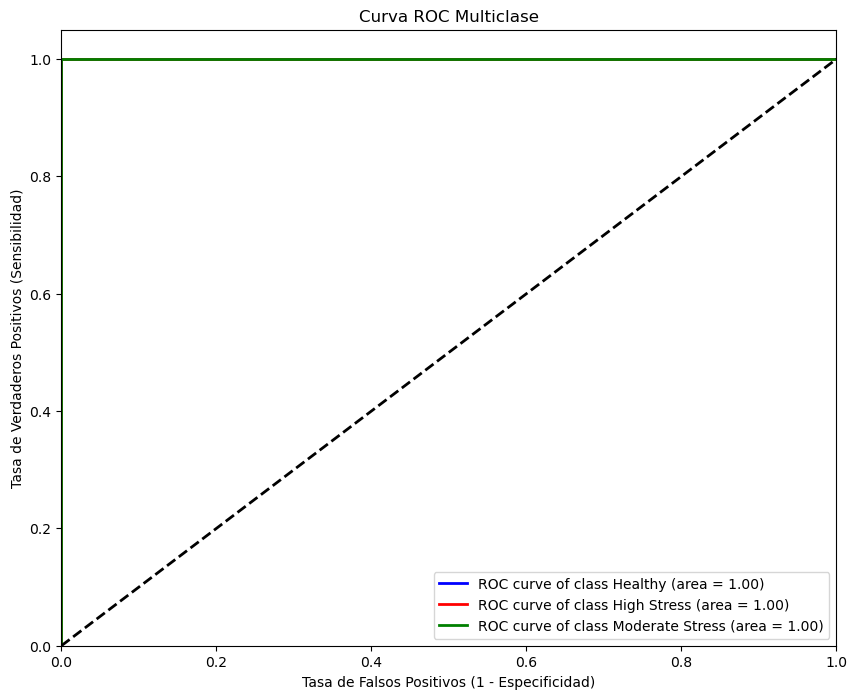

In [11]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarizar la salida para ROC multiclase
y_test_binarized = label_binarize(y_test, classes=range(len(le.classes_)))
n_classes = y_test_binarized.shape[1]

# Obtener las probabilidades de predicción para cada clase
y_score = model.predict_proba(X_test)

# Calcular la curva ROC y el área AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar las curvas ROC para cada clase
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'brown']) # Puedes añadir más colores si tienes más clases
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(le.inverse_transform([i])[0], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC Multiclase')
plt.legend(loc="lower right")
plt.show()

## ... 1. Revisar Fuga de Datos (Data Leakage)

Correlación de las características con 'Plant_Health_Status':
Plant_Health_Status       1.000000
Soil_Temperature          0.019565
Electrochemical_Signal    0.016194
Light_Intensity           0.011885
Ambient_Temperature       0.010043
Soil_pH                  -0.003037
Humidity                 -0.010071
Chlorophyll_Content      -0.017020
Phosphorus_Level         -0.036100
Potassium_Level          -0.070483
Nitrogen_Level           -0.117730
Soil_Moisture            -0.297279
Name: Plant_Health_Status, dtype: float64


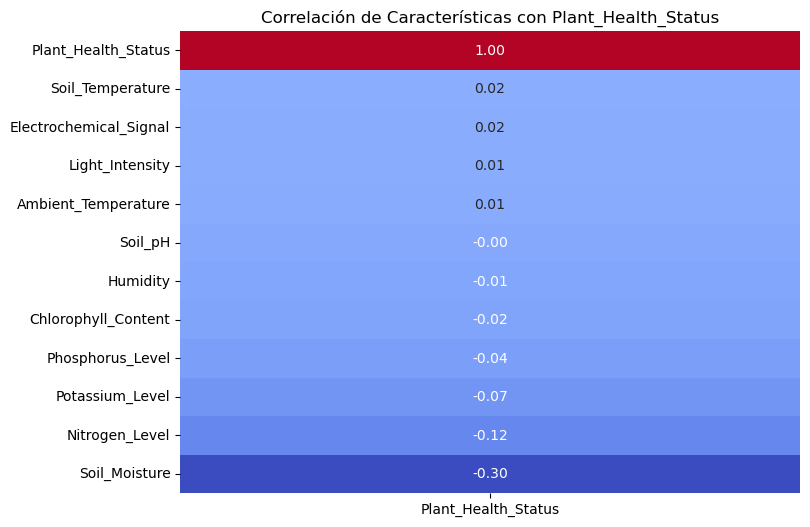

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Extrae la correlación con la variable objetivo
target_correlation = correlation_matrix['Plant_Health_Status'].sort_values(ascending=False)

print("Correlación de las características con 'Plant_Health_Status':")
print(target_correlation)

# Visualiza la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(target_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlación de Características con Plant_Health_Status')
plt.show()

highly_correlated_features = target_correlation[(target_correlation > 0.99) | (target_correlation < -0.99)]
if len(highly_correlated_features) > 1: 
    print("\n¡Advertencia! Posibles características con correlación extremadamente alta (o perfecta) con la variable objetivo:")
    print(highly_correlated_features.drop('Plant_Health_Status', errors='ignore'))

## 2. Investigar Sobreajuste (Overfitting)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# Evaluación en el conjunto de entrenamiento
print("--- Rendimiento en el Conjunto de Entrenamiento ---")
print(f"Precisión (Accuracy): {accuracy_score(y_train, y_train_pred):.4f}")
print("Reporte de Clasificación:")
print(classification_report(y_train, y_train_pred, target_names=le.classes_))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_train, y_train_pred))

# Rendimiento en el conjunto de prueba 
print("\n--- Rendimiento en el Conjunto de Prueba ---")
print(f"Precisión (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

--- Rendimiento en el Conjunto de Entrenamiento ---
Precisión (Accuracy): 1.0000
Reporte de Clasificación:
                 precision    recall  f1-score   support

        Healthy       1.00      1.00      1.00       234
    High Stress       1.00      1.00      1.00       415
Moderate Stress       1.00      1.00      1.00       311

       accuracy                           1.00       960
      macro avg       1.00      1.00      1.00       960
   weighted avg       1.00      1.00      1.00       960


Matriz de Confusión:
[[234   0   0]
 [  0 415   0]
 [  0   0 311]]

--- Rendimiento en el Conjunto de Prueba ---
Precisión (Accuracy): 0.9958
Reporte de Clasificación:
                 precision    recall  f1-score   support

        Healthy       1.00      1.00      1.00        65
    High Stress       1.00      0.99      0.99        85
Moderate Stress       0.99      1.00      0.99        90

       accuracy                           1.00       240
      macro avg       1.00      1.0

In [18]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

cv = KFold(n_splits=5, shuffle=True, random_state=42) # 5 pliegues es un buen punto de partida

scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print(f"\n--- Validación Cruzada (K-Fold = {cv.n_splits}) ---")
print(f"Precisión para cada pliegue: {scores}")
print(f"Precisión promedio: {np.mean(scores):.4f}")
print(f"Desviación estándar de la precisión: {np.std(scores):.4f}")


--- Validación Cruzada (K-Fold = 5) ---
Precisión para cada pliegue: [0.99583333 0.99583333 0.99583333 1.         1.        ]
Precisión promedio: 0.9975
Desviación estándar de la precisión: 0.0020


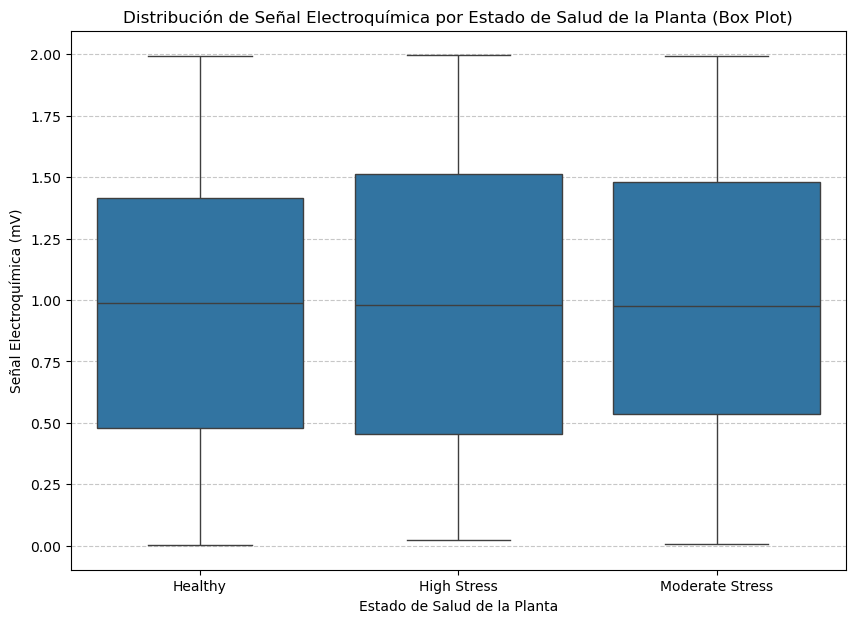

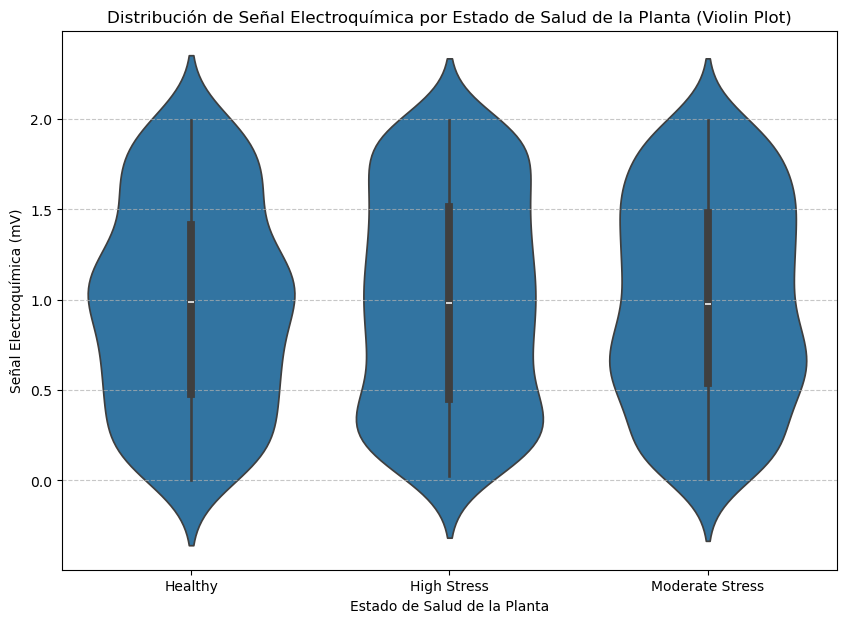

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

df['Plant_Health_Status_Categorical'] = le.inverse_transform(df['Plant_Health_Status'])

plt.figure(figsize=(10, 7))
sns.boxplot(x='Plant_Health_Status_Categorical', y='Electrochemical_Signal', data=df,
            order=le.inverse_transform(sorted(df['Plant_Health_Status'].unique()))) # Ordena las categorías
plt.title('Distribución de Señal Electroquímica por Estado de Salud de la Planta (Box Plot)')
plt.xlabel('Estado de Salud de la Planta')
plt.ylabel('Señal Electroquímica (mV)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 7))
sns.violinplot(x='Plant_Health_Status_Categorical', y='Electrochemical_Signal', data=df,
               order=le.inverse_transform(sorted(df['Plant_Health_Status'].unique())))
plt.title('Distribución de Señal Electroquímica por Estado de Salud de la Planta (Violin Plot)')
plt.xlabel('Estado de Salud de la Planta')
plt.ylabel('Señal Electroquímica (mV)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

df = df.drop('Plant_Health_Status_Categorical', axis=1)

In [ ]:
import pandas as pd

df['Plant_Health_Status_Categorical'] = le.inverse_transform(df['Plant_Health_Status'])

print("Rangos de Señal Electroquímica por Estado de Salud:")
for status_code, status_name in zip(sorted(df['Plant_Health_Status'].unique()), le.classes_):
    signal_values = df[df['Plant_Health_Status_Categorical'] == status_name]['Electrochemical_Signal']
    print(f"  {status_name}: Min = {signal_values.min():.2f}, Max = {signal_values.max():.2f}")

# Comprobación de superposición
healthy_min = df[df['Plant_Health_Status_Categorical'] == 'Healthy']['Electrochemical_Signal'].min()
healthy_max = df[df['Plant_Health_Status_Categorical'] == 'Healthy']['Electrochemical_Signal'].max()

moderate_min = df[df['Plant_Health_Status_Categorical'] == 'Moderate Stress']['Electrochemical_Signal'].min()
moderate_max = df[df['Plant_Health_Status_Categorical'] == 'Moderate Stress']['Electrochemical_Signal'].max()

high_min = df[df['Plant_Health_Status_Categorical'] == 'High Stress']['Electrochemical_Signal'].min()
high_max = df[df['Plant_Health_Status_Categorical'] == 'High Stress']['Electrochemical_Signal'].max()

if max(healthy_min, moderate_min) < min(healthy_max, moderate_max):
    print("\n¡Advertencia! Hay superposición entre 'Healthy' y 'Moderate Stress'.")
else:
    print("\nNo hay superposición directa entre 'Healthy' y 'Moderate Stress'.")

if max(moderate_min, high_min) < min(moderate_max, high_max):
    print("¡Advertencia! Hay superposición entre 'Moderate Stress' y 'High Stress'.")
else:
    print("No hay superposición directa entre 'Moderate Stress' y 'High Stress'.")

df = df.drop('Plant_Health_Status_Categorical', axis=1)

Rangos de Señal Electroquímica por Estado de Salud:
  Healthy: Min = 0.00, Max = 1.99
  High Stress: Min = 0.02, Max = 2.00
  Moderate Stress: Min = 0.01, Max = 1.99

¡Advertencia! Hay superposición entre 'Healthy' y 'Moderate Stress'.
¡Advertencia! Hay superposición entre 'Moderate Stress' y 'High Stress'.


# Re implementacion

### 9.1 Random Forest

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('plant_health_data.csv')
df = df.drop(['Timestamp', 'Plant_ID'], axis=1)
df = df.drop(['Electrochemical_Signal', 'Chlorophyll_Content'], axis=1)  # Eliminar estas dos sospechosas

le = LabelEncoder()
df['Plant_Health_Status'] = le.fit_transform(df['Plant_Health_Status'])

X = df.drop('Plant_Health_Status', axis=1)
y = df['Plant_Health_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Accuracy: 99.58%

Classification Report:
                 precision    recall  f1-score   support

        Healthy       1.00      1.00      1.00        65
    High Stress       1.00      0.99      0.99        85
Moderate Stress       0.99      1.00      0.99        90

       accuracy                           1.00       240
      macro avg       1.00      1.00      1.00       240
   weighted avg       1.00      1.00      1.00       240



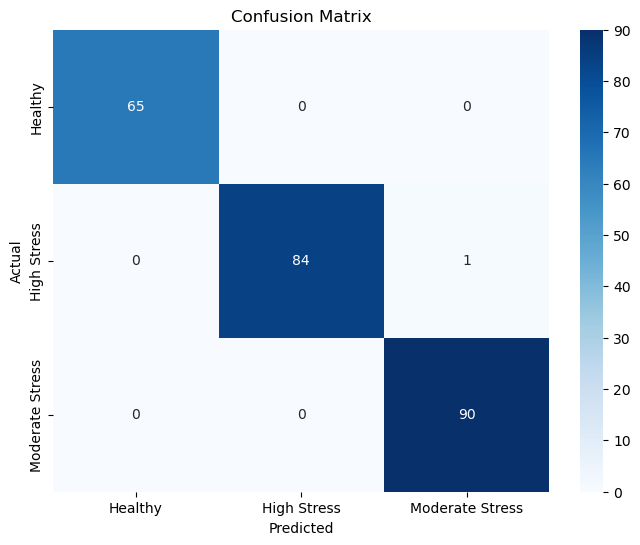

In [70]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Correlación de las características con 'Plant_Health_Status':
Plant_Health_Status    1.000000
Soil_Temperature       0.019565
Light_Intensity        0.011885
Ambient_Temperature    0.010043
Soil_pH               -0.003037
Humidity              -0.010071
Phosphorus_Level      -0.036100
Potassium_Level       -0.070483
Nitrogen_Level        -0.117730
Soil_Moisture         -0.297279
Name: Plant_Health_Status, dtype: float64


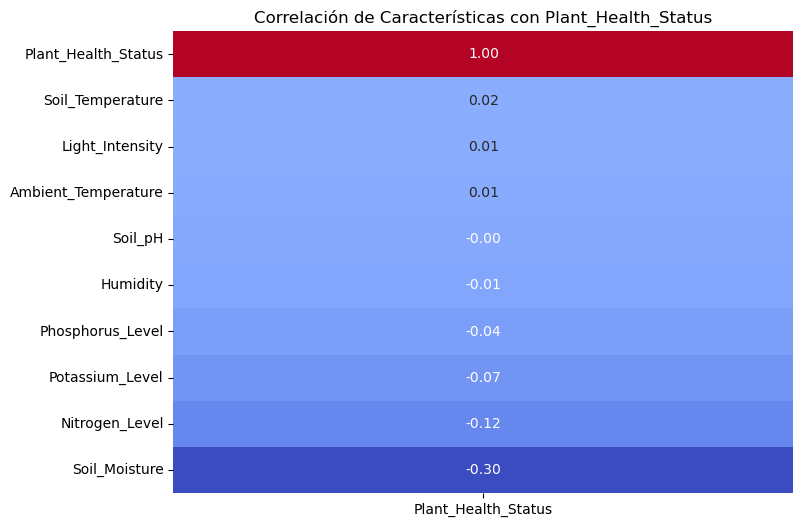

In [66]:
# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Extrae la correlación con la variable objetivo
target_correlation = correlation_matrix['Plant_Health_Status'].sort_values(ascending=False)

print("Correlación de las características con 'Plant_Health_Status':")
print(target_correlation)

# Visualiza la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(target_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlación de Características con Plant_Health_Status')
plt.show()

highly_correlated_features = target_correlation[(target_correlation > 0.99) | (target_correlation < -0.99)]
if len(highly_correlated_features) > 1: 
    print("\n¡Advertencia! Posibles características con correlación extremadamente alta (o perfecta) con la variable objetivo:")
    print(highly_correlated_features.drop('Plant_Health_Status', errors='ignore'))

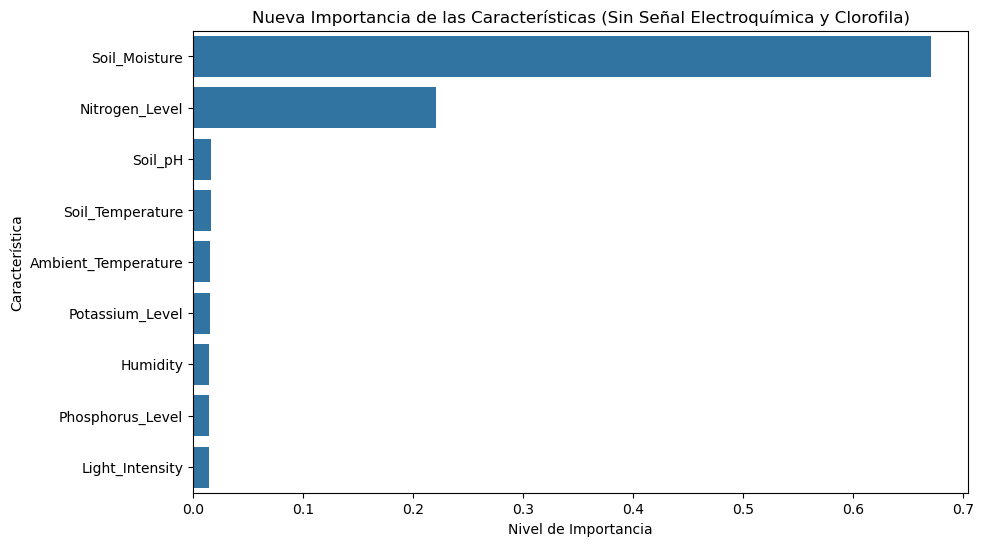


Nuevas Importancias de Características:
Soil_Moisture          0.671175
Nitrogen_Level         0.220991
Soil_pH                0.016723
Soil_Temperature       0.015947
Ambient_Temperature    0.015570
Potassium_Level        0.015479
Humidity               0.014903
Phosphorus_Level       0.014780
Light_Intensity        0.014433
dtype: float64


In [67]:

le = LabelEncoder()
df['Plant_Health_Status'] = le.fit_transform(df['Plant_Health_Status'])

X = df.drop('Plant_Health_Status', axis=1)
y = df['Plant_Health_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Nueva Importancia de las Características (Sin Señal Electroquímica y Clorofila)')
plt.xlabel('Nivel de Importancia')
plt.ylabel('Característica')
plt.show()

print("\nNuevas Importancias de Características:")
print(feature_importances)

Investigando: Soil_Moisture


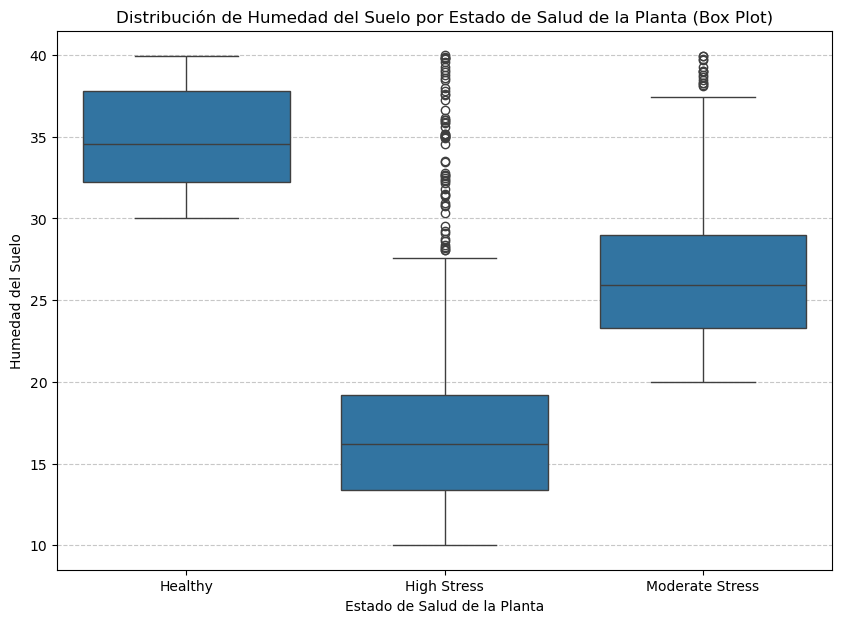

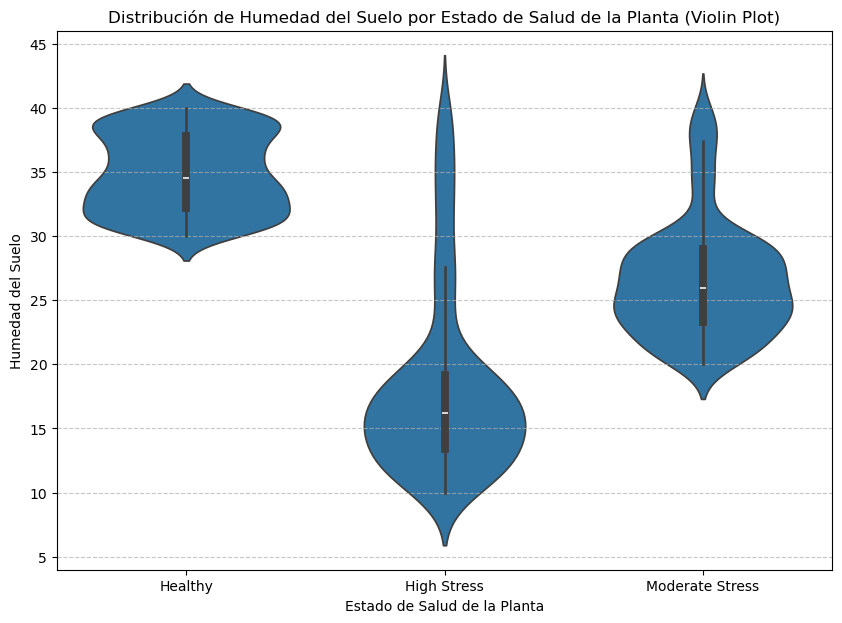


Investigando: Nitrogen_Level


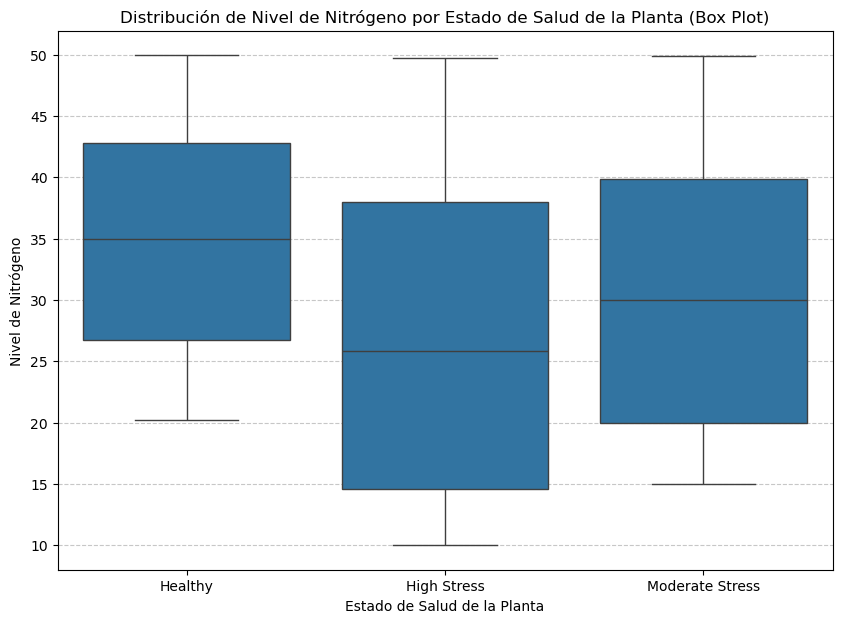

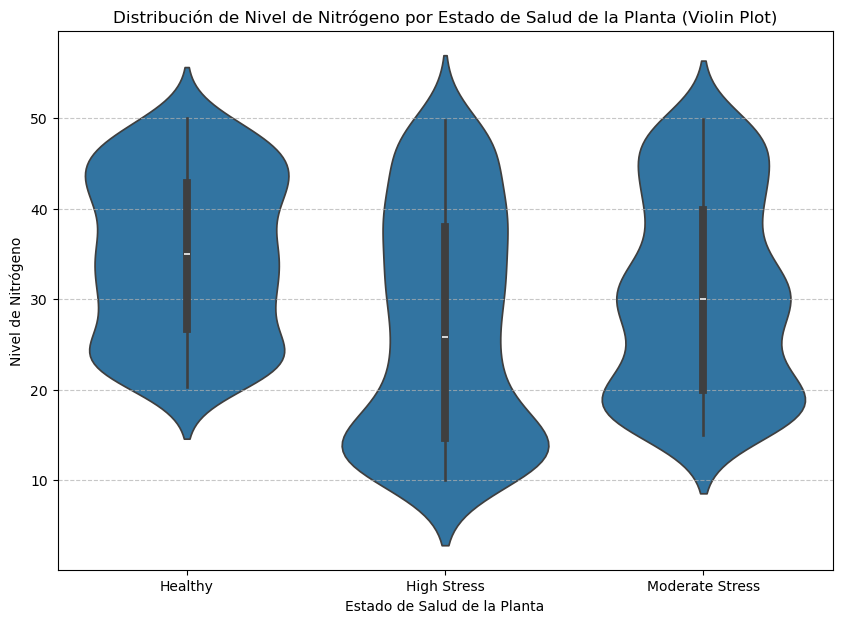


--- Rangos Numéricos para Soil_Moisture y Nitrogen_Level ---

Característica: Soil_Moisture
  Healthy: Min = 30.04, Max = 39.95
  High Stress: Min = 10.00, Max = 39.99
  Moderate Stress: Min = 20.01, Max = 39.97

Característica: Nitrogen_Level
  Healthy: Min = 20.25, Max = 49.95
  High Stress: Min = 10.00, Max = 49.73
  Moderate Stress: Min = 15.00, Max = 49.87


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df_updated = pd.read_csv('plant_health_data.csv')

df_updated = df_updated.drop(['Timestamp', 'Plant_ID'], axis=1)

df_updated = df_updated.drop(['Electrochemical_Signal', 'Chlorophyll_Content'], axis=1)

le = LabelEncoder()
df_updated['Plant_Health_Status'] = le.fit_transform(df_updated['Plant_Health_Status'])

df_updated['Plant_Health_Status_Categorical'] = le.inverse_transform(df_updated['Plant_Health_Status'])

# --- GRÁFICOS PARA SOIL_MOISTURE ------
print("Investigando: Soil_Moisture")
plt.figure(figsize=(10, 7))
sns.boxplot(x='Plant_Health_Status_Categorical', y='Soil_Moisture', data=df_updated,
            order=le.inverse_transform(sorted(df_updated['Plant_Health_Status'].unique()))) # Ordena las categorías
plt.title('Distribución de Humedad del Suelo por Estado de Salud de la Planta (Box Plot)')
plt.xlabel('Estado de Salud de la Planta')
plt.ylabel('Humedad del Suelo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 7))
sns.violinplot(x='Plant_Health_Status_Categorical', y='Soil_Moisture', data=df_updated,
               order=le.inverse_transform(sorted(df_updated['Plant_Health_Status'].unique())))
plt.title('Distribución de Humedad del Suelo por Estado de Salud de la Planta (Violin Plot)')
plt.xlabel('Estado de Salud de la Planta')
plt.ylabel('Humedad del Suelo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# ------ GRÁFICOS PARA NITROGEN_LEVEL ---
print("\nInvestigando: Nitrogen_Level")
plt.figure(figsize=(10, 7))
sns.boxplot(x='Plant_Health_Status_Categorical', y='Nitrogen_Level', data=df_updated,
            order=le.inverse_transform(sorted(df_updated['Plant_Health_Status'].unique())))
plt.title('Distribución de Nivel de Nitrógeno por Estado de Salud de la Planta (Box Plot)')
plt.xlabel('Estado de Salud de la Planta')
plt.ylabel('Nivel de Nitrógeno')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 7))
sns.violinplot(x='Plant_Health_Status_Categorical', y='Nitrogen_Level', data=df_updated,
               order=le.inverse_transform(sorted(df_updated['Plant_Health_Status'].unique())))
plt.title('Distribución de Nivel de Nitrógeno por Estado de Salud de la Planta (Violin Plot)')
plt.xlabel('Estado de Salud de la Planta')
plt.ylabel('Nivel de Nitrógeno')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# ---- Verificación Numérica de Rangos para las Nuevas Características Principales -----
print("\n--- Rangos Numéricos para Soil_Moisture y Nitrogen_Level ---")
features_to_check = ['Soil_Moisture', 'Nitrogen_Level']

for feature in features_to_check:
    print(f"\nCaracterística: {feature}")
    for status_code, status_name in zip(sorted(df_updated['Plant_Health_Status'].unique()), le.classes_):
        feature_values = df_updated[df_updated['Plant_Health_Status_Categorical'] == status_name][feature]
        print(f"  {status_name}: Min = {feature_values.min():.2f}, Max = {feature_values.max():.2f}")

df_updated = df_updated.drop('Plant_Health_Status_Categorical', axis=1)

In [58]:
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')
print('\\nSVM Classification Report:')
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

SVM Accuracy: 85.83%
\nSVM Classification Report:
                 precision    recall  f1-score   support

        Healthy       0.82      0.86      0.84        65
    High Stress       0.89      0.94      0.91        85
Moderate Stress       0.85      0.78      0.81        90

       accuracy                           0.86       240
      macro avg       0.86      0.86      0.86       240
   weighted avg       0.86      0.86      0.86       240



In [60]:
knn_model = KNeighborsClassifier(n_neighbors=12) # el k Óptimo
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
 # Evaluacion de modelo
print(f'KNN Accuracy: {accuracy_knn * 100:.2f}%')
print('\nKNN Classification Report:')
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))

KNN Accuracy: 76.25%

KNN Classification Report:
                 precision    recall  f1-score   support

        Healthy       0.79      0.80      0.79        65
    High Stress       0.77      0.92      0.84        85
Moderate Stress       0.73      0.59      0.65        90

       accuracy                           0.76       240
      macro avg       0.76      0.77      0.76       240
   weighted avg       0.76      0.76      0.76       240

